In [1]:
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
import scipy.io
from scipy import signal
import math
from scipy import integrate
import pandas as pd
import matplotlib.animation as animation
from scipy.optimize import curve_fit
from rocArea import rocArea
from sklearn import metrics

In [3]:
info = scipy.io.loadmat('HW5_data.mat')

This function parses the data into a dataframe

In [4]:

def file_parser(file_n,option=0):
  info = scipy.io.loadmat(file_n)
  dot_on = []
  dot_off = []
  dot_dir = []
  dot_coh = []
  task = []
  correct = []
  spikes = []
  cell = []
  for i in range(5):
    dot_on = []
    dot_off = []
    dot_dir = []
    dot_coh = []
    task = []
    correct = []
    spikes = []
    cell = []
    dot_on.append(info['cellArrayOfCells'][i,option][0,0][1][0,0][1][:,0])
    dot_off.append(info['cellArrayOfCells'][i,option][0,0][1][0,0][1][:,1])
    dot_dir.append(info['cellArrayOfCells'][i,option][0,0][1][0,0][1][:,2])
    dot_coh.append(info['cellArrayOfCells'][i,option][0,0][1][0,0][1][:,3])
    task.append(info['cellArrayOfCells'][i,option][0,0][1][0,0][1][:,4])
    correct.append(info['cellArrayOfCells'][i,option][0,0][1][0,0][1][:,5])
    spikes.append(info['cellArrayOfCells'][i,option][0,0][2][:,0])
    cell.append(np.linspace(i,i,len(dot_on[0])))
    #print(len(cell))
    #print((dot_on))
    dat_dict = {'cell':cell[0],'dot_on' : dot_on[0],'dot_off':dot_off[0], 'dot_dir':dot_dir[0], 'dot_coh':dot_coh[0], 'task':task[0], 'correct':correct[0],'spikes':spikes[0]}
    temp_df = pd.DataFrame(dat_dict)
    if i != 0:
      df_data = pd.concat([df_data,temp_df],ignore_index=True)
    else :
      df_data = temp_df
 # return dot_on, dot_off, dot_dir, dot_coh, task, correct,spikes
  return df_data

This function checks for spikes only within the duration when motion was started and turned off

In [5]:
df_data = file_parser('HW5_data.mat')
df_data['corrected_spikes'] = df_data['spikes'].apply(lambda x: [j for j in x[:,0]])
for i in range(len(df_data)):
  temp_arr = df_data['corrected_spikes'][i]
  temp_arr = [j for j in temp_arr if j>df_data['dot_on'][i]]
  df_data['corrected_spikes'][i] = temp_arr

#np.unique(n_data['cellArrayOfCells'][0][0][0][0][1][0][0][1])
# 1st is the Cell
#2nd is the column
# 5th is the data you want (ecode, psike,header)
# 6 and 7 is to get the individual array

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Question 1

**(a) Compute and plot (in polar coordinates, MATLAB command: polar) the mean spike rates measured during stimulus presentation as a function of motion direction. For each trial, compute the spike rate over the entire motion-viewing interval. The mean spike rate should be measured across all trials with the same motion direction. Do not forget to normalize by the total viewing time for each direction. Produce separate plots for each cell.**

This function calculates the mean spike rate in every direction

In [6]:
def spike_counter(df_data,option = 1):
  firing_rate = []
  fr_arr = []
  dir_arr = []
  fr_arr_fin = []
  dir_arr_fin = []
  for i in range(5):
    fr_arr = []
    dir_arr = []
    temp_df = df_data.where(df_data['cell']==i).dropna()
    for dir in np.sort(df_data['dot_dir'].unique()):
      temp_df_2 = temp_df.where(temp_df['dot_dir']==dir).dropna()
      dir_arr.append(dir)
      temp_df_2['total_time'] = temp_df_2['dot_off'] - temp_df_2['dot_on']
      #temp_df_2['spikes'] = temp_df_2['spikes'].apply(lambda x :)
      
      if option == 1:
        temp_df_2['n_spikes'] = temp_df_2['corrected_spikes'].apply(lambda x:len(x))
      elif option == 2:
        temp_df_2['n_spikes'] = temp_df_2['spikes<200'].apply(lambda x:len(x))
      elif option == 3:
        temp_df_2['n_spikes'] = temp_df_2['spikes>200'].apply(lambda x:len(x))
      
      temp_df_2['firing_rate'] = temp_df_2['n_spikes']*1000/temp_df_2['total_time']
      fr_arr.append(sum(temp_df_2['firing_rate'])/len(temp_df_2))
    fr_arr_fin.append(fr_arr)
    dir_arr_fin.append(dir_arr)
  return fr_arr_fin,dir_arr_fin


In [7]:
def polar_plots(df_data,plots = 1,fn = 1):
  if fn == 1:
    fr_arr_fin, dir_arr_fin = spike_counter(df_data)
  elif fn == 2:
    fr_arr_fin, dir_arr_fin = spike_counter(df_data,2)
  elif fn == 3:
    fr_arr_fin, dir_arr_fin = spike_counter(df_data,3)
  for j in range(5):
    dir_arr_fin[j] = [i*np.pi/180.0 for i in dir_arr_fin[j]]
    if plots == 1:
      plt.figure()
      plt.polar((dir_arr_fin[j]),fr_arr_fin[j])
  return dir_arr_fin,fr_arr_fin

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

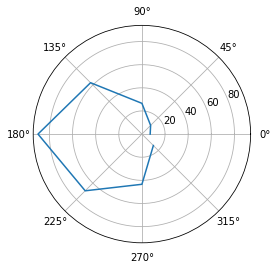

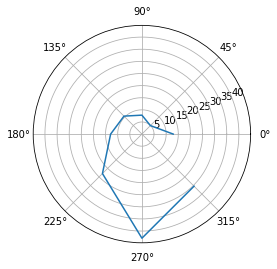

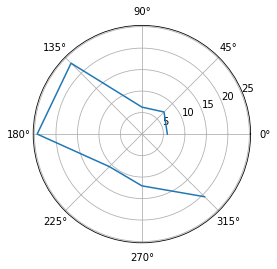

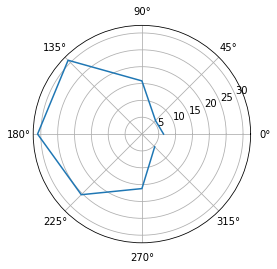

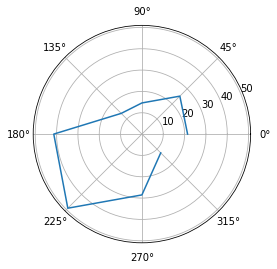

In [8]:
dr_arr,fr_arr = polar_plots(df_data)

**b. Fit the relationship between mean spike rate M and motion direction θ using a von Mises function:**

In [9]:
def von_mises_fn(theta,k,phi,A):
  return( A*np.exp(k*(np.cos(theta-phi)-1)))

In [10]:
def von_mos_fit(dir_arr_fin,fr_arr_fin,plot_flag = 1):
  x_data_fin = []
  y_data_fin = []
  x_dir_fin = []
  y_dir_fin = []
  for j in range(5):
    pars,cov = curve_fit(von_mises_fn,xdata=dir_arr_fin[j],ydata = fr_arr_fin[j])
    x_data = np.linspace(0,3.14*2,50)
    y_data = []
    for i in x_data:
      y_data.append(von_mises_fn(i,pars[0],pars[1],pars[2]))

    if plot_flag == 1:
      plt.figure()
      plt.polar(x_data,y_data,label = 'fit')
      plt.polar((dir_arr_fin[j]),fr_arr_fin[j],label = 'data')
      plt.legend()
    x_data_fin.append(x_data)
    y_data_fin.append(y_data)
    x_dir_fin.append(dir_arr_fin[j])
    y_dir_fin.append(fr_arr_fin[j])
  
  return x_dir_fin,y_dir_fin,x_data_fin,y_data_fin

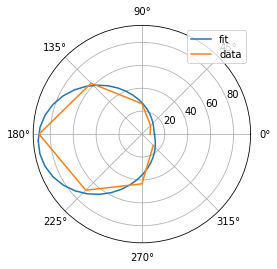

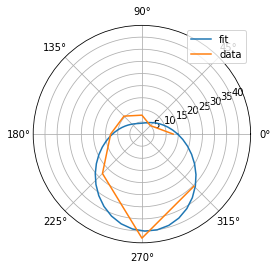

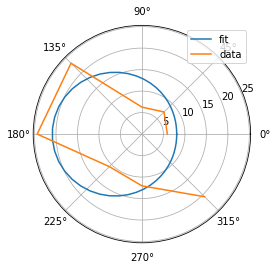

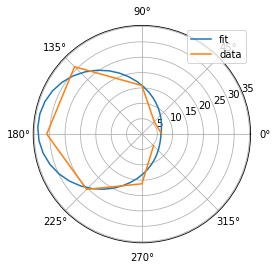

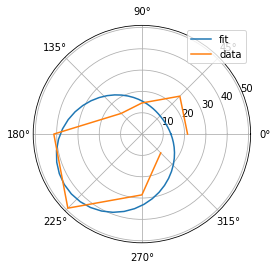

In [11]:
x,y,xx,yy = von_mos_fit(dr_arr,fr_arr)

**c. How does the direction tuning in the first 200 ms of the response compare to the tuning later in the response?**

In [12]:
df_data['threshold_time'] = df_data['dot_on'] + 200
fin_temp_1 = []
fin_temp_2 = []
for i in range(len(df_data)):
  temp_arr = df_data['corrected_spikes'][i]
  temp_arr_1 = [j for j in temp_arr if j<=df_data['threshold_time'][i]]
  temp_arr_2 = [j for j in temp_arr if j>df_data['threshold_time'][i]]
  fin_temp_1.append(temp_arr_1)
  fin_temp_2.append(temp_arr_2)
df_data['spikes<200']= fin_temp_1
df_data['spikes>200'] =fin_temp_2


Less than 200

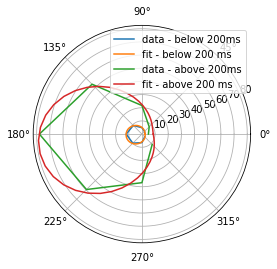

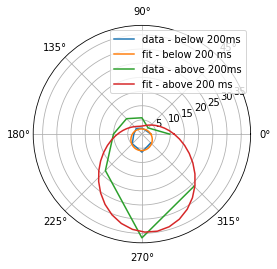

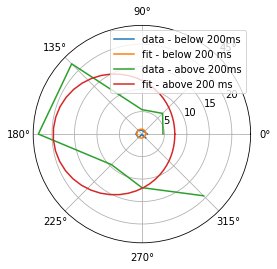

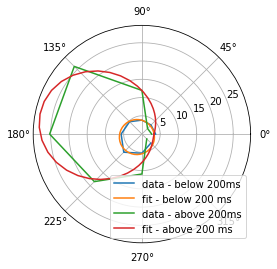

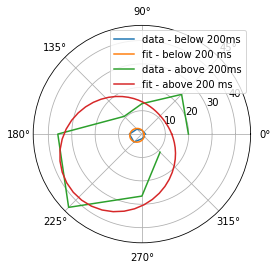

In [14]:
dr_arr_200,fr_arr_200 = polar_plots(df_data,0,2)
x11, y11,x12,y12 = von_mos_fit(dr_arr_200,fr_arr_200,0)
dr_arr_201,fr_arr_201 = polar_plots(df_data,0,3)
x21,y21,x22,y22 = von_mos_fit(dr_arr_201,fr_arr_201,0)

for i in range(len(x11)):
  plt.figure()
  plt.polar(x11[i],y11[i],label = 'data - below 200ms')
  plt.polar(x12[i],y12[i],label = 'fit - below 200 ms')
  plt.polar(x21[i],y21[i],label = 'data - above 200ms')
  plt.polar(x22[i],y22[i],label = 'fit - above 200 ms')
  plt.legend()

**As we can see, the response to the input is much stronger when the duration is longer than 200 ms. The preffered angles seem to be the same, but only the magnitude is changing.**

# Question 2

**(a) Compute ROC curves (one for each cell during presentation of each coherence level) based on firing rates corresponding to motion in the preferred and opposite directions. For each cell, plot the ROC curves for all the different coherences in one graph. Make a separate graph for each cell, and find the area under each ROC curve. A routine rocN.m to compute ROC curves and the ROC area can be downloaded from Canvas. A short description of the routine is given at the beginning of the file.**

In [15]:
d_df = file_parser('HW5_data.mat',1)
d_df['corrected_spikes'] = d_df['spikes'].apply(lambda x: [j for j in x[:,0]])
for i in range(len(d_df)):
  temp_arr = d_df['corrected_spikes'][i]
  temp_arr = [j for j in temp_arr if j>d_df['dot_on'][i]]
  d_df['corrected_spikes'][i] = temp_arr


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


This function calculates the roc, given two parameters x and y

In [16]:
def roc(x,y):
  zlo = min(min(x),min(y))
  zhigh = min(max(x),max(y))
  z = np.linspace(zlo,zhigh,50)
  fa =[]
  hit = []
  #print(len(z))
  for i in range(50):
    temp_x = [j for j in y if j>z[i]]
    temp_y = [j for j in x if j>z[i]]
    fa.append(len(temp_x))
    hit.append(len(temp_y))
  fa.append(0)
  hit.append(0)
  fa = fa[::-1]
  hit = hit[::-1]
  fa = [j/len(y) for j in fa]
  hit = [j/len(x) for j in hit]
  fa.append(1)
  hit.append(1)
  area = np.trapz(hit,fa)
  #print(len(fa),len(hit))
  #plt.plot(fa,hit)
  return fa, hit, area

This function plots the graphs and also returns a list containing the areas of the ROC curves for each coherence in each cell

In [17]:
pref_dir = [[180,0],[315,135],[180,0],[180,0],[200,20]]

In [18]:
def roc_calc(d_df,pref_dir,option = 1,plot_flag = 1,threshold = 600):
  areas = []
  for i in range(5):
    plt.figure()
    temp_area = []
    for coh in np.sort(d_df['dot_coh'].unique()):
      temp_df = d_df.where(d_df['cell']==i).dropna()
      temp_df = temp_df.where(temp_df['dot_coh']==coh).dropna()
      x_data_roc = temp_df.where(temp_df['dot_dir']==pref_dir[i][0]).dropna()
      y_data_roc = temp_df.where(temp_df['dot_dir']==pref_dir[i][1]).dropna()
      x_data_roc['total_time'] = x_data_roc['dot_off'] - x_data_roc['dot_on']

      if option == 1 :
        x_data_roc['n_spikes'] =x_data_roc['spikes'].apply(lambda x:len(x))
      elif option == 2 :
        x_data_roc = x_data_roc.where(x_data_roc['duration']<threshold).dropna()
        x_data_roc['n_spikes'] =x_data_roc['spikes'].apply(lambda x:len(x))
      elif option == 3:
        x_data_roc = x_data_roc.where(x_data_roc['duration']>threshold).dropna()
        x_data_roc['n_spikes'] =x_data_roc['spikes'].apply(lambda x:len(x))
  
      x_data_roc['firing_rate'] = x_data_roc['n_spikes']*1000/x_data_roc['total_time']
      y_data_roc['total_time'] = y_data_roc['dot_off'] - y_data_roc['dot_on']
      if option == 1 :
        y_data_roc['n_spikes'] =y_data_roc['spikes'].apply(lambda x:len(x))
      elif option == 2:
        y_data_roc = y_data_roc.where(y_data_roc['duration']<threshold).dropna()
        y_data_roc['n_spikes'] =y_data_roc['spikes'].apply(lambda x:len(x))
      elif option == 3:        
        y_data_roc = y_data_roc.where(y_data_roc['duration']>threshold).dropna()
        y_data_roc['n_spikes'] =y_data_roc['spikes'].apply(lambda x:len(x))

      y_data_roc['firing_rate'] = y_data_roc['n_spikes']*1000/y_data_roc['total_time']

      """
      area, alphas,betas = rocArea(x_data_roc['firing_rate'].tolist(),y_data_roc['firing_rate'].tolist())
      plt.plot(alphas,betas,label = str(coh))
      plt.legend()
      """
      fa,hit, area = roc(x_data_roc['firing_rate'].tolist(),y_data_roc['firing_rate'].tolist())
      temp_area.append(area)
      if plot_flag == 1:
        plt.plot(fa,hit,label = str(coh))
        plt.xlabel('False Positive')
        plt.ylabel('True Positive')
        plt.legend()
    areas.append(temp_area)
  return areas

**ROC Curves**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

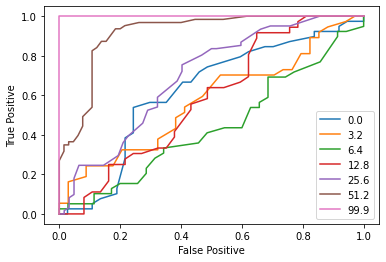

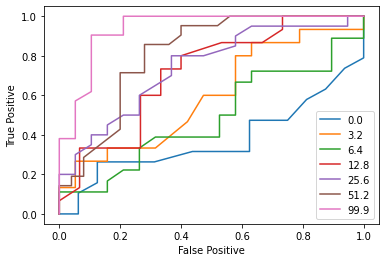

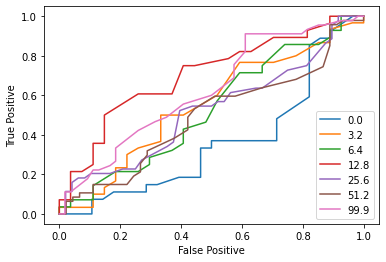

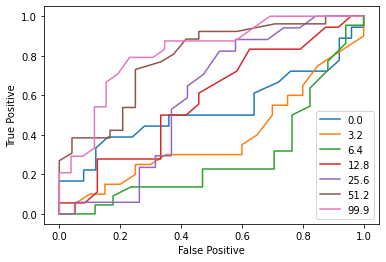

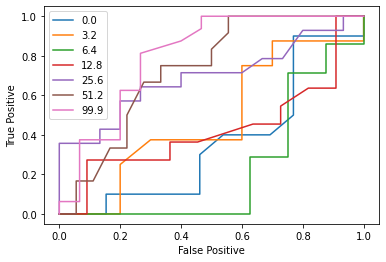

In [19]:
areas = roc_calc(d_df,pref_dir)

In [20]:
x_data_wb = [0.0,0.032,0.064,0.128,0.256,0.512,0.999]
for i in range(len(areas)):
  print("In cell " + str(i) +", the ROC curve areas are - ")
  for j in range(len(x_data_wb)):
    print("Coherence = " + str(x_data_wb[j]) + "Area = " +str(areas[i][j]))
  print('--------')

In cell 0, the ROC curve areas are - 
Coherence = 0.0Area = 0.6195426195426195
Coherence = 0.032Area = 0.5715421303656598
Coherence = 0.064Area = 0.441025641025641
Coherence = 0.128Area = 0.5829579579579579
Coherence = 0.256Area = 0.6950026441036488
Coherence = 0.512Area = 0.9151404151404151
Coherence = 0.999Area = 1.0
--------
In cell 1, the ROC curve areas are - 
Coherence = 0.0Area = 0.3733552631578947
Coherence = 0.032Area = 0.5964912280701754
Coherence = 0.064Area = 0.4853801169590643
Coherence = 0.128Area = 0.7155555555555556
Coherence = 0.256Area = 0.7407894736842106
Coherence = 0.512Area = 0.8104761904761905
Coherence = 0.999Area = 0.9360902255639098
--------
In cell 2, the ROC curve areas are - 
Coherence = 0.0Area = 0.3644179894179895
Coherence = 0.032Area = 0.5512345679012346
Coherence = 0.064Area = 0.5277777777777778
Coherence = 0.128Area = 0.7037037037037037
Coherence = 0.256Area = 0.5248579545454545
Coherence = 0.512Area = 0.49408983451536637
Coherence = 0.999Area = 0.626

**b. Fit the neurometric function (probability correct p, computed as the ROC area, versus coherence c) with a cumulative Weibull function.**

**Weibull function Fit - Neurometric**

In [21]:
def weibull_fn(c,alpha,beta):
  return 1 - 0.5*np.exp(-((c/alpha)**beta))

In [22]:
def wb_neurometric_fit(areas,plot =1):
  x_data_wb_fin = []
  y_data_wb_fin = []
  x_data_fit_fin = []
  y_data_fit_fin = []
  for i in range(len(areas)):
    plt.figure()
    y_data_wb = areas[i]
    x_data_wb = [0.0,0.032,0.064,0.128,0.256,0.512,0.999]
    pars,cov = curve_fit(weibull_fn,x_data_wb,y_data_wb)
    x_data_fit = np.linspace(0,1,100)
    y_data_fit = [weibull_fn(j,pars[0],pars[1]) for j in x_data_fit]
    if plot == 1:
      plt.plot(x_data_fit,y_data_fit,label = 'fit')
      plt.xlim(0,1)
      plt.ylim(0,1)
      plt.xlabel('Coherence')
      plt.ylabel('Probability correct')
      plt.scatter(x_data_wb,y_data_wb,label = 'data')
      plt.legend()
    x_data_wb_fin.append(x_data_wb)
    y_data_wb_fin.append(y_data_wb)
    x_data_fit_fin.append(x_data_fit)
    y_data_fit_fin.append(y_data_fit)
  return x_data_wb_fin,y_data_wb_fin,x_data_fit_fin,y_data_fit_fin

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


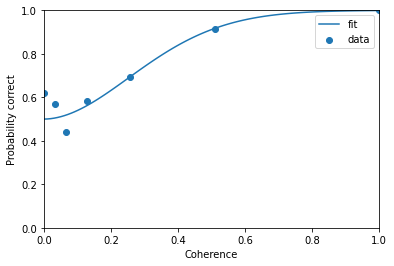

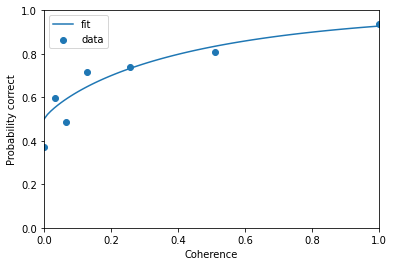

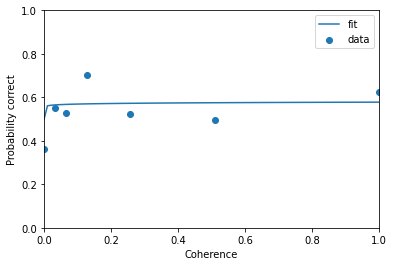

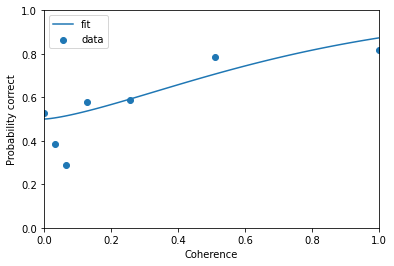

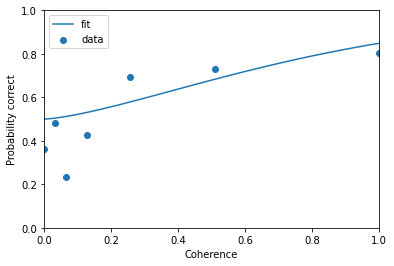

In [23]:
x11,y12,x12,y12 = wb_neurometric_fit(areas)

**(c) Fit the behavioral data (percent correct versus coherence) with cumulative Weibull functions and plot them.**

**Weibull function Fit - Behavioural**

In [24]:
def wb_behaviour_fit(d_df,plot_flag = 1):
  x_data_wb_fin = []
  y_data_wb_fin = []
  x_data_fit_fin = []
  y_data_fit_fin = []
  for i in range(5):
    perc_correct = []
    temp_df = d_df.where(d_df['cell']==i).dropna()
    for coh in np.sort(temp_df['dot_coh'].unique()):
      temp_df_2 = temp_df.where(temp_df['dot_coh']==coh).dropna()
      x_data_roc = temp_df_2.where(temp_df['dot_dir']==pref_dir[i][0]).dropna()
      y_data_roc = temp_df_2.where(temp_df['dot_dir']==pref_dir[i][1]).dropna()
      correct_sum = x_data_roc['correct'].sum() + y_data_roc['correct'].sum()
      perc_correct.append(correct_sum/(len(x_data_roc)+len(y_data_roc)))
    x_data_wb = [0.0,0.032,0.064,0.128,0.256,0.512,0.999]
    pars,cov = curve_fit(weibull_fn,x_data_wb,perc_correct)
    x_data_fit = np.linspace(0,1,100)
    y_data_fit = [weibull_fn(j,pars[0],pars[1]) for j in x_data_fit]
    x_data_wb_fin.append(x_data_wb)
    y_data_wb_fin.append(perc_correct)
    x_data_fit_fin.append(x_data_fit)
    y_data_fit_fin.append(y_data_fit)
    if plot_flag == 1:
      plt.figure()
      plt.plot(x_data_fit,y_data_fit,label = 'fit')
      plt.plot(x_data_wb,perc_correct,label = 'Data')
      plt.xlim(0,1)
      plt.ylim(0,1)
      plt.xlabel('Coherence')
      plt.ylabel('Probability correct')
      plt.legend() 

  return x_data_wb_fin,y_data_wb_fin,x_data_fit_fin,y_data_fit_fin

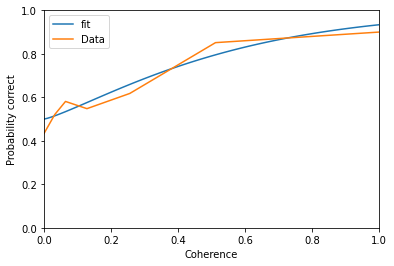

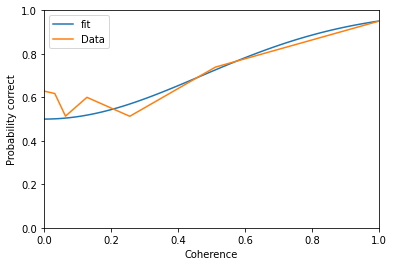

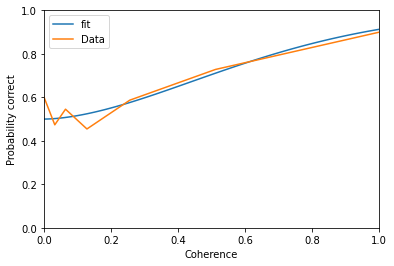

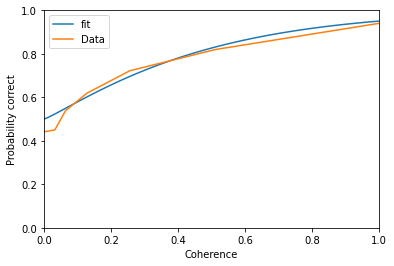

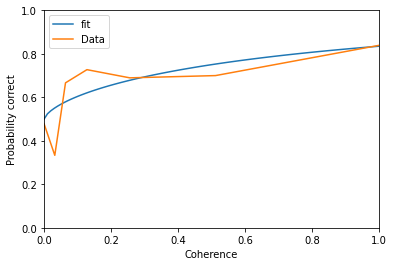

In [25]:
x1,y1,x2,y2 = wb_behaviour_fit(d_df)

**d) How do the neurometric and psychometric functions change when considering only short- or long-duration trials? Choose a threshold for what you want to call short- or long-duration trials because the speed of the monkey’s response is a continuous distribution.**

693.8999999999069

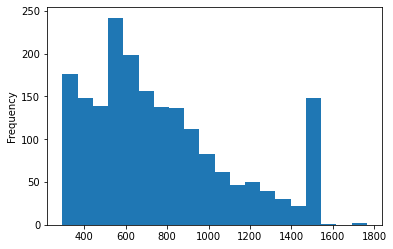

In [26]:
d_df['duration'] = d_df['dot_off'] - d_df['dot_on']
d_df['duration'].plot.hist(bins = 20)
d_df['duration'].median()

Here, we see that the distribution is skewed. For this reason, we will be using the median of the distribution as a threshold for the long/short duration cutoffs.

In [27]:
thresh = d_df['duration'].median()

**Neurometric**


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

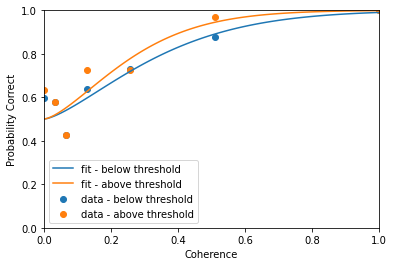

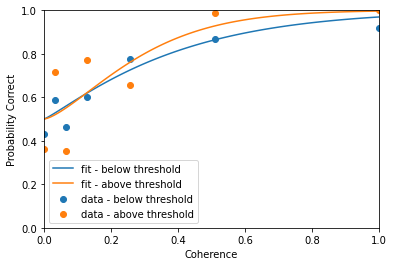

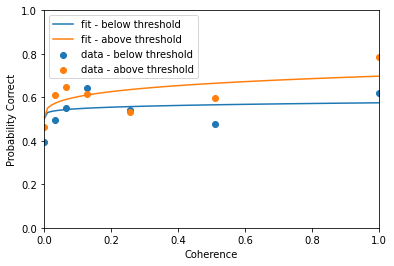

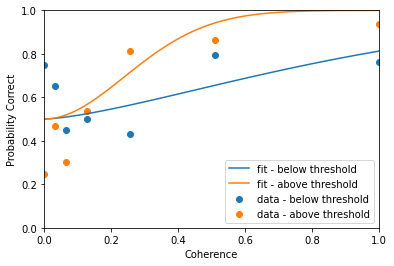

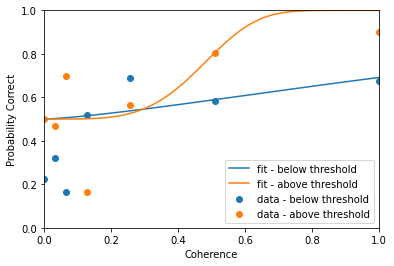

In [28]:
areas2 = roc_calc(d_df,pref_dir,2,0,thresh)
x21,y21,x22,y22 = wb_neurometric_fit(areas2,0)
areas3 = roc_calc(d_df,pref_dir,3,0,thresh)
x31,y31,x32,y32 = wb_neurometric_fit(areas3,0)

for i in range(len(x21)):
  plt.figure()
  plt.scatter(x21[i],y21[i],label = 'data - below threshold')
  plt.scatter(x31[i],y31[i],label = 'data - above threshold')
  plt.plot(x22[i],y22[i],label = 'fit - below threshold')
  plt.plot(x32[i],y32[i],label = 'fit - above threshold')
  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.xlabel('Coherence')
  plt.ylabel('Probability Correct')
  plt.legend()


**Behavioral**

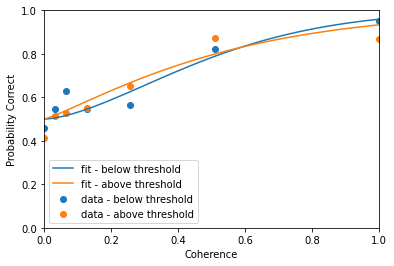

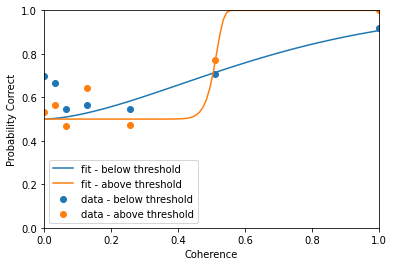

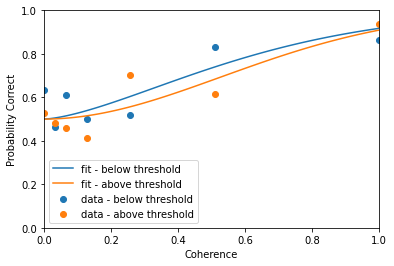

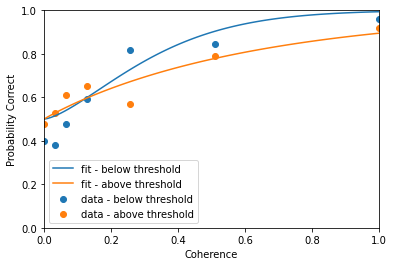

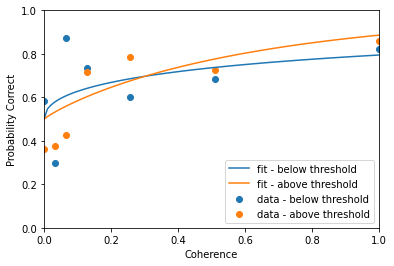

In [29]:
temp_df = d_df.where(d_df['duration']<thresh).dropna()
x21,y21,x22,y22 = wb_behaviour_fit(temp_df,0)
temp_df = d_df.where(d_df['duration']>thresh).dropna()
x31,y31,x32,y32 = wb_behaviour_fit(temp_df,0)

for i in range(len(x21)):
  plt.figure()
  plt.scatter(x21[i],y21[i],label = 'data - below threshold')
  plt.scatter(x31[i],y31[i],label = 'data - above threshold')
  plt.plot(x22[i],y22[i],label = 'fit - below threshold')
  plt.plot(x32[i],y32[i],label = 'fit - above threshold')
  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.xlabel('Coherence')
  plt.ylabel('Probability Correct')
  plt.legend()

On comparison of long and short duration responses, we see that 
- In Neurometric data, cells 4 and 5 have some deviation between long duration and short duration response.
- In Behavioural data, there is no major difference between the long duration and short duration responses.